In [1]:
# HBWT_AnaSynth example
# Developed by Aldo Diaz
# University of Campinas, 2020

import lib.libhbwt as HBWT_Ana # HBWT Analysis
import lib.libihbwt as HBWT_Synth # HBWT Synthesis
from scipy.signal import daub, qmf # Daubechies wavelets
from scipy.io import wavfile # WAV files
from lib.stereo2mono import * # stereo to mono conversion
from lib.float32 import * # 'float32' input data type normalization
from lib.estimatef0 import * # fundamental frequency estimation
from lib.libsignalplot import * # plotting library
import numpy as np # (AUX) numeric library
import matplotlib.pyplot as plt # (AUX) graphics library
from IPython.display import Audio

In [2]:
# Load input signal
filename = 'quena'
fs, x = wavfile.read('./input/'+filename+'.wav') # input signal 'x'
if x.ndim == 2: x = stereo2mono(x) # mono audio conversion
xn, data_type = float32(x) # data type normalization

In [3]:
# Model parameters
h     = daub(11) # Daubechies-11 low pass filter coefficients
g     = qmf(h) # Daubechies-11 high pass filter coefficients
f0, P = estimatef0(xn, fs) # f0: estimated fundamental frequency (Hertz)
                           # P: estimated (integer) signal period (given in number of samples)
N     = 5 # levels of wavelet decomposition

In [4]:
# Analysis step
a, b, w = HBWT_Ana.hbwt(xn, h, g, P, N) # HBWT decomposition 'a' and 'b' and CMFB filter bank 'w'

In [5]:
# Synthesis step
yn = HBWT_Synth.ihbwt(a, b, h, g) # reconstructed signal 'xn'

In [6]:
# Write ouput signal
yn = yn[:len(x)] # prune ending zeros [TODO: can you avoid this nuisance step inside HBWT filtering?]
y = ifloat32(yn, data_type) # data type back normalization
wavfile.write('./output/'+filename+'_synth.wav', fs, y) # write WAV output file

In [7]:
# Play the reconstructed signal
audio = Audio(data=y, rate=fs)
audio

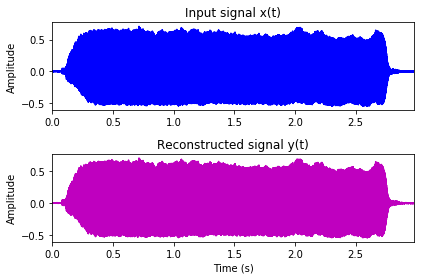

In [8]:
# Plots
plt.ion()

# Input signal x[n]
plotSignal(xn, yn, fs)

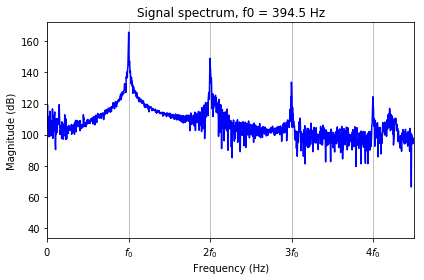

In [9]:
# DFT spectrum magnitude
NFFT = 32*1024 # number of DFT points
k    = 4.5 # Number of signal harmonics to display
plotSignalSpectrum(x, NFFT, f0, k, fs, 'dB')

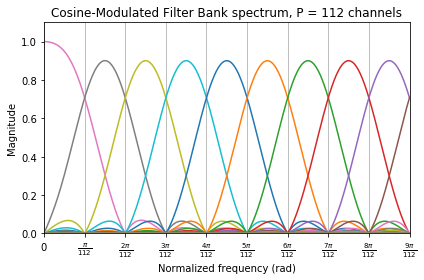

In [10]:
# CMFB magnitude spectrum
plotCMFBSpectrum(w[::-1,:], NFFT, P, k, 'mag')

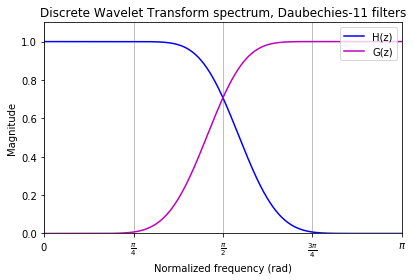

In [11]:
# DWT spectrum of filters H(z) and G(z)
plotDWTSpectrum(h, g, NFFT, 'mag')